In [177]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=BOOTCAMPDA\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [179]:
cursor = conn.cursor()

In [180]:
query = "SELECT Name, SquareFeet AS Size_Of_Store, NumberEmployees, AnnualRevenue FROM Sales.vStoreWithDemographics ORDER BY Size_Of_Store"

In [181]:
df = pd.read_sql(query, conn)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_1368\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [182]:
df['NumberEmployeesNormalized'] = (df['NumberEmployees'] - df['NumberEmployees'].min()) / (df['NumberEmployees'].max() - df['NumberEmployees'].min())

In [183]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

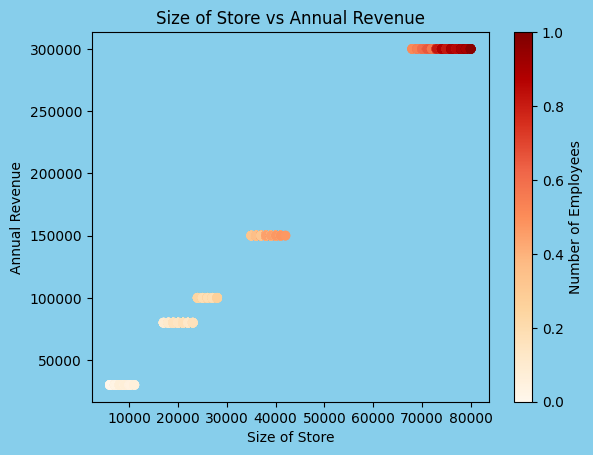

In [184]:
plt.rcParams['axes.facecolor'] = 'none'
plt.figure(facecolor='skyblue')
plt.scatter(df['Size_Of_Store'], df['AnnualRevenue'], c=df['NumberEmployeesNormalized'], cmap='OrRd')
plt.xlabel('Size of Store')
plt.ylabel('Annual Revenue')
plt.title('Size of Store vs Annual Revenue')
plt.colorbar(label='Number of Employees')

In [185]:
plt.show()